<a href="https://colab.research.google.com/github/Shivdutta/CNN/blob/master/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Convolutional Neural Network

# Installing Theano
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
!pip install tensorflow

# Installing Keras
!pip install --upgrade keras

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-20552k1e
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-20552k1e
  Created wheel for Theano: filename=Theano-1.0.4+34.g473d74ea4-cp36-none-any.whl size=2667786 sha256=dbfb6e2e02c2337cf64c3654a33aabc7256eec99ee51e53b7c4451afa552fac2
  Stored in directory: /tmp/pip-ephem-wheel-cache-id87cag7/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4
     |████████████████████████████████| 378kB 1.6MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [0]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

!unzip -q "/content/gdrive/My Drive/CNN_Images/Images.zip"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
%ls Images/Images

Shiv/  Siddhant/


In [29]:
# Initialising the CNN
path = "Images/Images/"
classifier1 = Sequential()

# Step 1 - Convolution
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier1.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier1.add(Flatten())

# Step 4 - Full connection
classifier1.add(Dense(units = 128, activation = 'relu'))

classifier1.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(path,
                                                 target_size = (64, 64),
                                                 batch_size = 32)

test_set = test_datagen.flow_from_directory(path,
                                            target_size = (64, 64),
                                            batch_size = 32)

classifier1.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 2000)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 1493s 187ms/step - loss: 2.9724e-04 - acc: 0.9999 - val_loss: 1.0960e-07 - val_acc: 1.0000


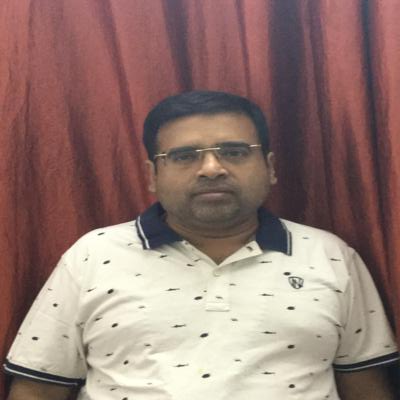

type:: <class 'numpy.ndarray'>
1.0
Shiv


In [30]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('Images/Images/Shiv/IMG_3011.jpg',1)
cv2_imshow(cv2.rotate(img,rotateCode=0))
print('type::',type(img))

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Images/Images/Shiv/IMG_3011.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier1.predict(test_image)
training_set.class_indices

print(result[0][0])

if result[0][0] == 1:
    prediction = 'Shiv'
    print(prediction)
else:
    prediction = 'Siddhant'
    print(prediction)

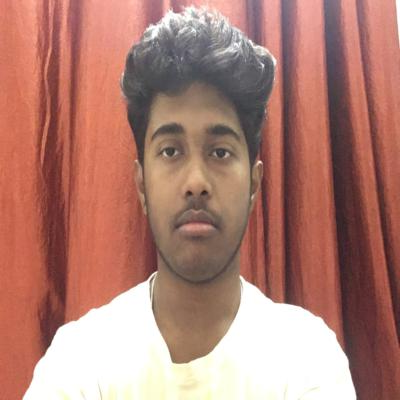

type:: <class 'numpy.ndarray'>
0.0
Siddhant


In [31]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('Images/Images/Siddhant/IMG_3214.jpg',1)
cv2_imshow(cv2.rotate(img,rotateCode=1))
print('type::',type(img))

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Images/Images/Siddhant/IMG_3214.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier1.predict(test_image)
training_set.class_indices

print(result[0][0])

if result[0][0] == 1:
    prediction = 'Shiv'
    print(prediction)
else:
    prediction = 'Siddhant'
    print(prediction)

In [32]:
# Initialising the CNN
path = "Images/Images/"
classifier1 = Sequential()

# Step 1 - Convolution
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier1.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier1.add(Flatten())

# Step 4 - Full connection
classifier1.add(Dense(units = 128, activation = 'relu'))

classifier1.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(path,
                                                 target_size = (64, 64),
                                                 batch_size = 32)

test_set = test_datagen.flow_from_directory(path,
                                            target_size = (64, 64),
                                            batch_size = 32)

classifier1.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 2000)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 1507s 188ms/step - loss: 2.0056e-04 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000


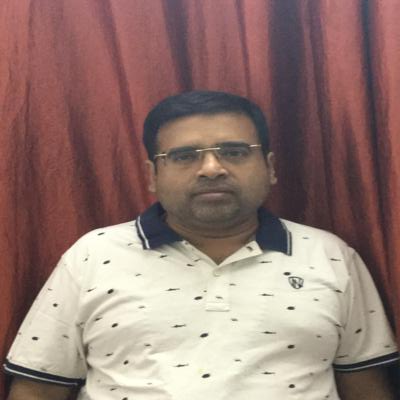

type:: <class 'numpy.ndarray'>
1.0
Shiv


In [33]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('Images/Images/Shiv/IMG_3011.jpg',1)
cv2_imshow(cv2.rotate(img,rotateCode=0))
print('type::',type(img))

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Images/Images/Shiv/IMG_3011.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier1.predict(test_image)
training_set.class_indices

print(result[0][0])

if result[0][0] == 1:
    prediction = 'Shiv'
    print(prediction)
else:
    prediction = 'Siddhant'
    print(prediction)

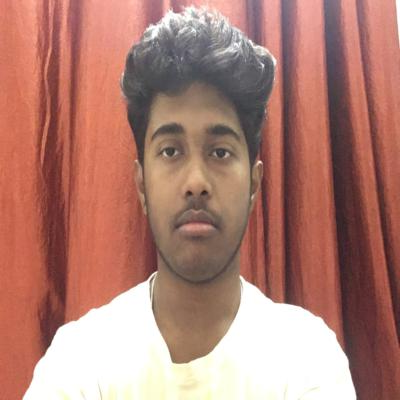

type:: <class 'numpy.ndarray'>
0.0
Siddhant


In [34]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('Images/Images/Siddhant/IMG_3214.jpg',1)
cv2_imshow(cv2.rotate(img,rotateCode=1))
print('type::',type(img))

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Images/Images/Siddhant/IMG_3214.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier1.predict(test_image)
training_set.class_indices

print(result[0][0])

if result[0][0] == 1:
    prediction = 'Shiv'
    print(prediction)
else:
    prediction = 'Siddhant'
    print(prediction)

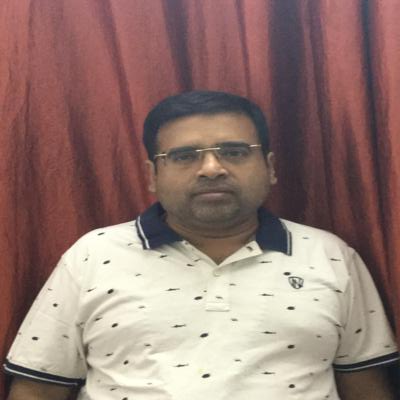

type:: <class 'numpy.ndarray'>


In [28]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('Images/Images/Shiv/IMG_3011.jpg',1)
cv2_imshow(cv2.rotate(img,rotateCode=0))
print('type::',type(img))